# 1. Question #1 on page 363 of ISLR Python

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


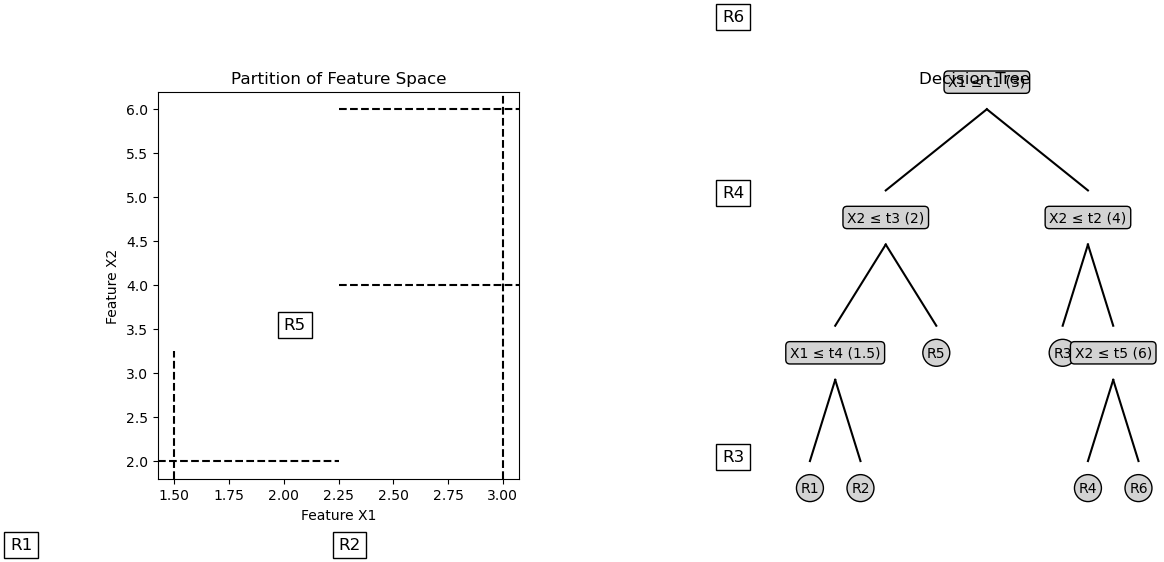

In [2]:
# Create a figure with two subplots: (a) feature space partition, (b) decision tree
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# ----------------------
# (a) Feature space partition in 2D (X1, X2)
# ----------------------
ax = axes[0]
ax.set_title("Partition of Feature Space")
ax.set_xlabel("Feature X1")
ax.set_ylabel("Feature X2")
# Draw partition lines
# Vertical cut at X1 = t1
ax.axvline(x=3, color="black", linestyle="--")
# Horizontal cut at X2 = t2 in right region
ax.axhline(y=4, xmin=0.5, xmax=1, color="black", linestyle="--")
# Horizontal cut at X2 = t3 in left region
ax.axhline(y=2, xmin=0, xmax=0.5, color="black", linestyle="--")
# Vertical cut in bottom-left region at X1 = t4
ax.axvline(x=1.5, ymin=0, ymax=0.33, color="black", linestyle="--")
# Horizontal cut in top-right region at X2 = t5
ax.axhline(y=6, xmin=0.5, xmax=1, color="black", linestyle="--")

# Annotate regions
regions = {
    "R1": (0.75, 1),
    "R2": (2.25, 1),
    "R3": (4, 2),
    "R4": (4, 5),
    "R5": (2, 3.5),
    "R6": (4, 7),
}

for r, (x, y) in regions.items():
    ax.text(x, y, r, fontsize=12, bbox=dict(facecolor="white", edgecolor="black"))

# ----------------------
# (b) Decision tree structure
# ----------------------
ax = axes[1]
ax.set_title("Decision Tree")
ax.axis("off")

# Draw nodes manually
def draw_node(ax, text, center, boxstyle="round", fontsize=10):
    ax.text(center[0], center[1], text, ha="center", va="center",
            bbox=dict(boxstyle=boxstyle, facecolor="lightgray"), fontsize=fontsize)

# Root split: X1 <= t1?
draw_node(ax, "X1 ≤ t1 (3)", (0.5, 1.0))

# Left branch -> X2 ≤ t3?
ax.plot([0.5, 0.3], [0.95, 0.8], color="black")
draw_node(ax, "X2 ≤ t3 (2)", (0.3, 0.75))

# Right branch -> X2 ≤ t2?
ax.plot([0.5, 0.7], [0.95, 0.8], color="black")
draw_node(ax, "X2 ≤ t2 (4)", (0.7, 0.75))

# Left-bottom -> X1 ≤ t4?
ax.plot([0.3, 0.2], [0.7, 0.55], color="black")
draw_node(ax, "X1 ≤ t4 (1.5)", (0.2, 0.5))

# Left-top -> R5
ax.plot([0.3, 0.4], [0.7, 0.55], color="black")
draw_node(ax, "R5", (0.4, 0.5), boxstyle="circle")

# Expand left-bottom leaves
ax.plot([0.2, 0.15], [0.45, 0.3], color="black")
draw_node(ax, "R1", (0.15, 0.25), boxstyle="circle")
ax.plot([0.2, 0.25], [0.45, 0.3], color="black")
draw_node(ax, "R2", (0.25, 0.25), boxstyle="circle")

# Right-bottom -> R3
ax.plot([0.7, 0.65], [0.7, 0.55], color="black")
draw_node(ax, "R3", (0.65, 0.5), boxstyle="circle")

# Right-top -> X2 ≤ t5?
ax.plot([0.7, 0.75], [0.7, 0.55], color="black")
draw_node(ax, "X2 ≤ t5 (6)", (0.75, 0.5))

# Expand right-top leaves
ax.plot([0.75, 0.7], [0.45, 0.3], color="black")
draw_node(ax, "R4", (0.7, 0.25), boxstyle="circle")
ax.plot([0.75, 0.8], [0.45, 0.3], color="black")
draw_node(ax, "R6", (0.8, 0.25), boxstyle="circle")

plt.tight_layout()
plt.show()

# 2. Question #12 on page 366 of ISLR Python. 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
from ISLP import load_data, confusion_table
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from ISLP.bart import BART
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


C:\Users\alber\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
# 1) Load Carseats and one-hot encode categoricals as float
carseats = sm.datasets.get_rdataset("Carseats", "ISLR").data
car = pd.get_dummies(carseats, columns=["ShelveLoc", "Urban", "US"], drop_first=True, dtype=float)


In [5]:
print(car.head())
print(car.info())
print(car.describe())

   Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   
3   7.40        117     100            4         466     97   55         14   
4   4.15        141      64            3         340    128   38         13   

   ShelveLoc_Good  ShelveLoc_Medium  Urban_Yes  US_Yes  
0             0.0               0.0        1.0     1.0  
1             1.0               0.0        1.0     1.0  
2             0.0               1.0        1.0     1.0  
3             0.0               1.0        1.0     1.0  
4             0.0               0.0        1.0     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------

C:\Users\alber\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


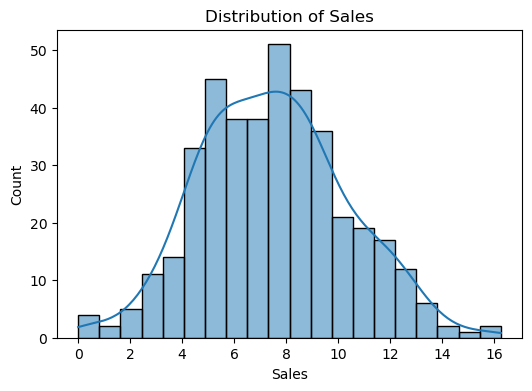

In [6]:
#Target Variable (Sales) Distribution
plt.figure(figsize=(6,4))
sns.histplot(car['Sales'], kde=True, bins=20)
plt.title("Distribution of Sales")
plt.show()


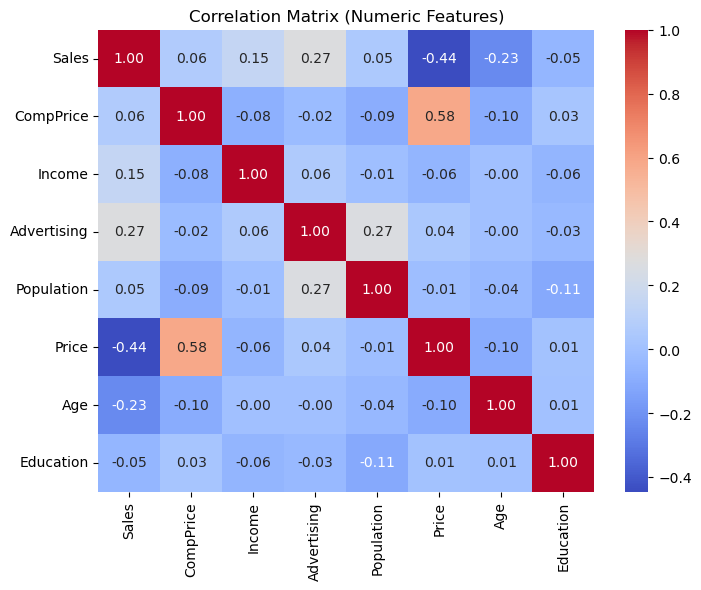

In [7]:
# Select only numeric columns
numeric_cols = carseats.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(8,6))
sns.heatmap(car[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


C:\Users\alber\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alber\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alber\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alber\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

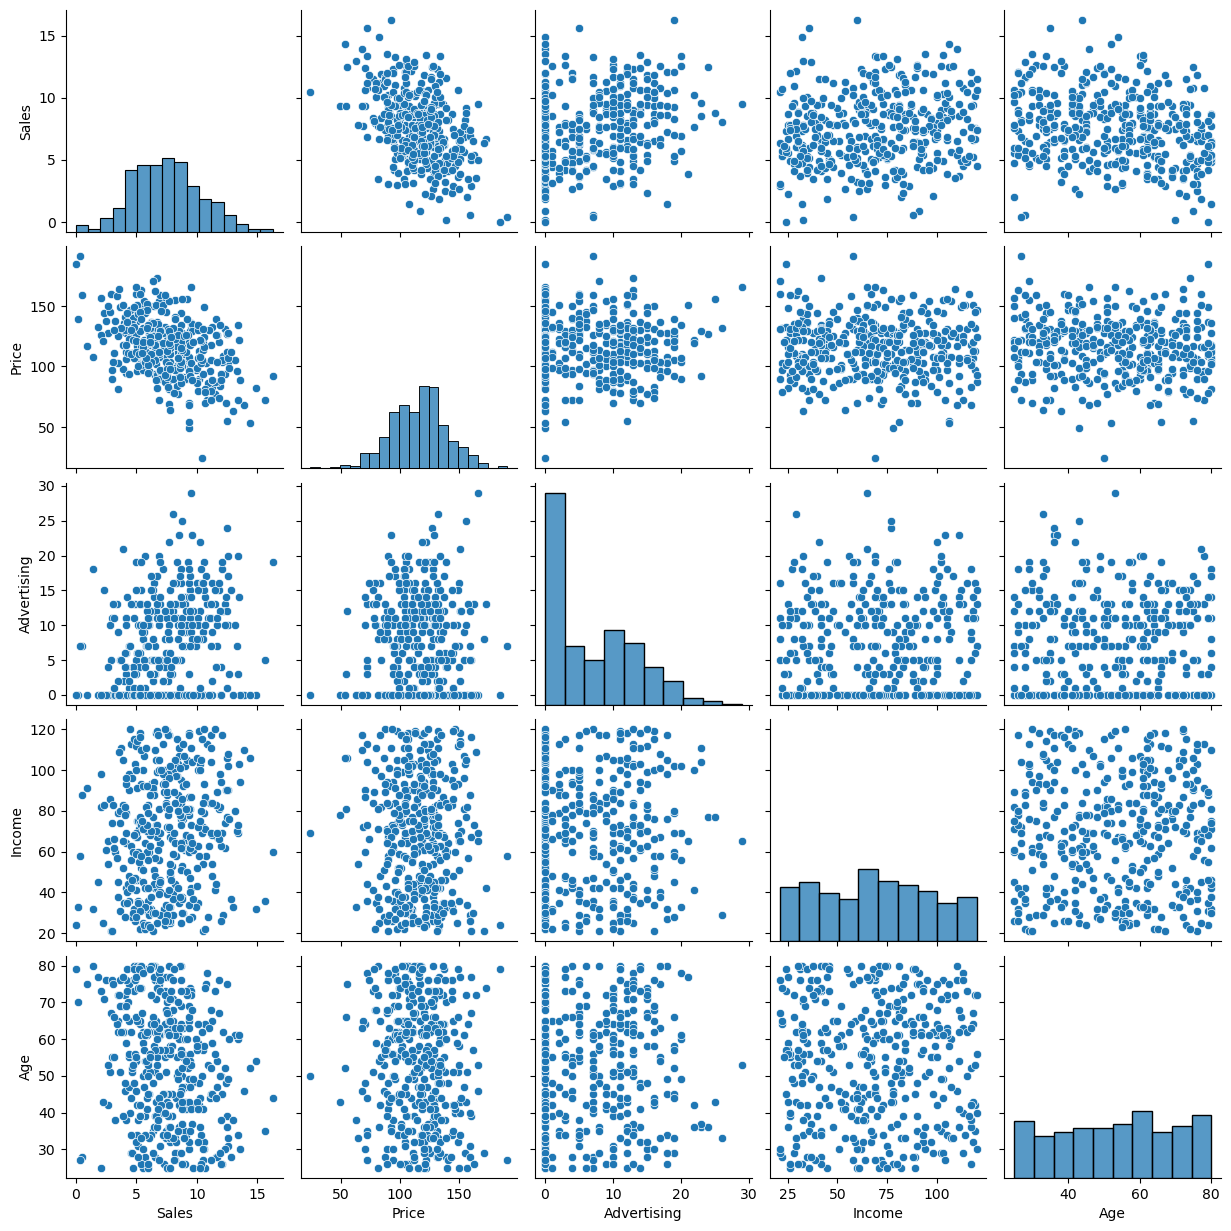

In [8]:
sns.pairplot(car, vars=["Sales","Price","Advertising","Income","Age"])
plt.show()


In [9]:
car.isnull().sum()

Sales               0
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_Yes           0
US_Yes              0
dtype: int64

In [10]:

# 2) Split X/y and ensure pure float arrays
X = car.drop(columns=["Sales"])   # This stays a DataFrame with column names
y = car["Sales"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)

In [11]:
#Bagging Model

bag = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=200,
    random_state=85,
    n_jobs=-1
)

bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

rmse_bag = np.sqrt(mean_squared_error(y_test, y_pred_bag))
print("Bagging RMSE:", rmse_bag)


Bagging RMSE: 1.7503997248188294


Random Forest RMSE: 1.7577566007688032


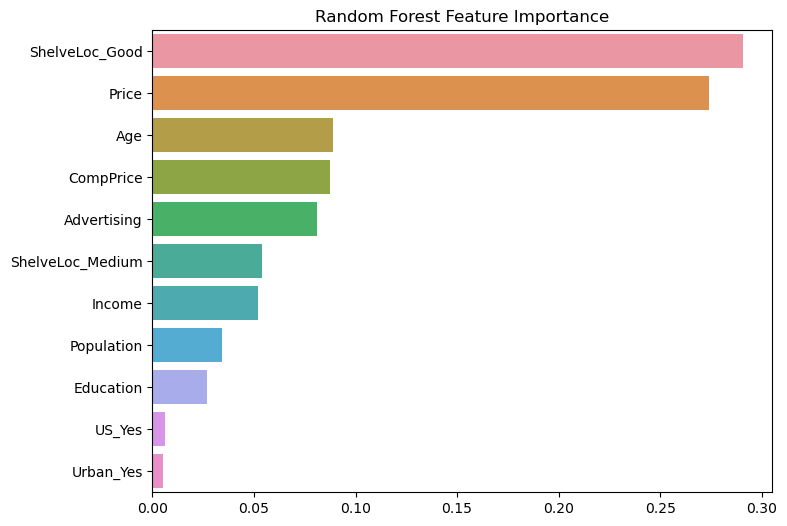

In [12]:
# Random Forest

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)

imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=imp, y=imp.index)
plt.title("Random Forest Feature Importance")
plt.show()

In [13]:
# Gradient Boosting

gb = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print("Gradient Boosting RMSE:", rmse_gb)


Gradient Boosting RMSE: 1.5579112729058857


In [14]:

# guard: replace inf with nan, then drop rows with any nan
X = np.where(np.isfinite(X), X, np.nan)
mask = ~np.isnan(X).any(axis=1) & np.isfinite(y)
X, y = X[mask], y[mask]


# 4) Fit BART
bart = BART()
bart.fit(X_train, y_train)

# 5) Predict and evaluate
y_pred = bart.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("BART RMSE:", rmse

BART RMSE: 1.2635623204374051


In [15]:

# 5. Add constant (intercept) to train and test sets
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# 6. Fit OLS model on training data
lin_model = sm.OLS(y_train, X_train_const).fit()
print(lin_model.summary())

# 7. Predict on test set
y_pred = lin_model.predict(X_test_const)

# 8. Evaluate with RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     173.2
Date:                Sat, 30 Aug 2025   Prob (F-statistic):          6.86e-115
Time:                        16:02:17   Log-Likelihood:                -395.67
No. Observations:                 280   AIC:                             815.3
Df Residuals:                     268   BIC:                             859.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4691      0.764  

In [16]:
# Collect results in a dictionary
results = {
    "Model": ["Bagging", "Random Forest", "Boosting", "BART", "Linear Regression"],
    "RMSE": [rmse_bag, rmse_rf, rmse_gb, rmse, rmse]  # careful: rmse repeated for BART & LinReg?
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display as table
print(results_df)

               Model      RMSE
0            Bagging  1.750400
1      Random Forest  1.757757
2           Boosting  1.557911
3               BART  1.039711
4  Linear Regression  1.039711


# 3.Compete in the Multi-class Prediction of Obesity Risk competition (late submission) on Kaggle.com

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [18]:
os.chdir('C:\\Users\\alber\\OneDrive\\Desktop\\PhD DS Courses\\Predictive Analysis')

In [19]:
train = pd.read_csv("Obesity_train.csv")
test = pd.read_csv("Obesity_test.csv")

In [20]:
# --- Separate features and target ---
X = train.drop(columns=["id", "NObeyesdad"])
y = train["NObeyesdad"]

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(include="number").columns
# --- Preprocessing pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


# Decision Tree

In [21]:
# decision_tree_simple.py
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

TARGET = "NObeyesdad"
ID_COL = "id"
RANDOM_STATE = 85



# --- Split features/target ---
y = train[TARGET]
X = train.drop(columns=[TARGET])

# --- Lightweight preprocessing: one-hot encode categoricals with pandas ---
# Do train first, then align test to train's columns.
X_dum = pd.get_dummies(X, drop_first=False)
test_X = pd.get_dummies(test.drop(columns=[ID_COL], errors="ignore"), drop_first=False)
test_X = test_X.reindex(columns=X_dum.columns, fill_value=0)

# --- Model ---
clf = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    class_weight="balanced"  # helpful for class imbalance
)

# Optional quick CV (macro-F1) – can be commented out if you want ultra-minimal
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scores = cross_val_score(clf, X_dum, y, cv=cv, scoring="f1_macro")
print(f"DecisionTree 5-fold Macro-F1: {scores.mean():.4f} ± {scores.std():.4f}")

# --- Fit on full data & predict ---
clf.fit(X_dum, y)
preds = clf.predict(test_X)

# --- Write submission ---
sub = pd.DataFrame({ID_COL: test[ID_COL], TARGET: preds})
sub.to_csv("submission_decision_tree.csv", index=False)
print("Saved submission_decision_tree.csv")


DecisionTree 5-fold Macro-F1: 0.8270 ± 0.0037
Saved submission_decision_tree.csv


# bagged model

In [22]:
# bagging_simple.py
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# --- Model: Bagging of Decision Trees ---
base = DecisionTreeClassifier(random_state=RANDOM_STATE)
bag = BaggingClassifier(
    estimator=base,          # for older sklearn, use base_estimator=base
    n_estimators=200,
    bootstrap=True,
    n_jobs=-1,
    random_state=RANDOM_STATE
)

# Optional quick CV (macro-F1) – comment out if you want ultra-minimal
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scores = cross_val_score(bag, X_dum, y, cv=cv, scoring="f1_macro", n_jobs=-1)
print(f"Bagging 5-fold Macro-F1: {scores.mean():.4f} ± {scores.std():.4f}")

# --- Fit on full data & predict ---
bag.fit(X_dum, y)
preds = bag.predict(test_X)

# --- Write submission ---
sub_bagged = pd.DataFrame({ID_COL: test[ID_COL], TARGET: preds})
sub_bagged.to_csv("submission_bagging.csv", index=False)
print("Saved submission_bagging.csv")

Bagging 5-fold Macro-F1: 0.8837 ± 0.0057
Saved submission_bagging.csv


# random forest

In [23]:
# random_forest_simple.py
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold



# --- Model: Random Forest ---
rf = RandomForestClassifier(
    n_estimators=300,        # number of trees
    max_depth=None,          # let trees expand fully
    class_weight="balanced", # handle class imbalance
    n_jobs=-1,
    random_state=RANDOM_STATE
)

# Optional quick CV (macro-F1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scores = cross_val_score(rf, X_dum, y, cv=cv, scoring="f1_macro", n_jobs=-1)
print(f"RandomForest 5-fold Macro-F1: {scores.mean():.4f} ± {scores.std():.4f}")

# --- Fit on full data & predict ---
rf.fit(X_dum, y)
preds = rf.predict(test_X)

# --- Write submission ---
sub_RandomForest = pd.DataFrame({ID_COL: test[ID_COL], TARGET: preds})
sub_RandomForest.to_csv("submission_random_forest.csv", index=False)
print("Saved submission_random_forest.csv")


RandomForest 5-fold Macro-F1: 0.8808 ± 0.0045
Saved submission_random_forest.csv


# boosted model

In [24]:

n_classes = y.nunique()

# Try XGBoost first; fall back to sklearn HistGradientBoosting if missing
try:
    from xgboost import XGBClassifier
    from sklearn.model_selection import cross_val_score, StratifiedKFold

    print("Using XGBoost…")
    clf = XGBClassifier(
        objective="multi:softmax",   # direct class predictions
        num_class=n_classes,
        n_estimators=600,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method="hist",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        eval_metric="mlogloss"
    )

    # Optional quick CV (macro-F1)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    scores = cross_val_score(clf, X_dum, y, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"XGBoost 5-fold Macro-F1: {scores.mean():.4f} ± {scores.std():.4f}")

    # Fit & predict
    clf.fit(X_dum, y)
    preds = clf.predict(test_X)

    # Optional: export gain-based feature importances
    try:
        importances = clf.feature_importances_
        fi = (pd.DataFrame({"feature": X_dum.columns, "importance": importances})
                .sort_values("importance", ascending=False))
        fi.to_csv("boosted_feature_importances.csv", index=False)
        print("Saved boosted_feature_importances.csv")
    except Exception:
        pass

except Exception as e:
    print("XGBoost not available or failed to import. Falling back to HistGradientBoosting.")
    from sklearn.experimental import enable_hist_gradient_boosting  # noqa: F401
    from sklearn.ensemble import HistGradientBoostingClassifier
    from sklearn.model_selection import cross_val_score, StratifiedKFold

    clf = HistGradientBoostingClassifier(
        learning_rate=0.07,
        max_depth=None,          # leaf-based growth; depth=None lets it grow
        max_iter=400,
        l2_regularization=0.0,
        random_state=RANDOM_STATE
    )

    # Optional quick CV (macro-F1)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    scores = cross_val_score(clf, X_dum, y, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"HistGB 5-fold Macro-F1: {scores.mean():.4f} ± {scores.std():.4f}")

    # Fit & predict (predict_proba -> classes)
    clf.fit(X_dum, y)
    preds = clf.predict(test_X)

# --- Write submission ---
sub_HistGB = pd.DataFrame({ID_COL: test[ID_COL], TARGET: preds})
sub_HistGB.to_csv("submission_boosted.csv", index=False)
print("Saved submission_boosted.csv")


Using XGBoost…
XGBoost not available or failed to import. Falling back to HistGradientBoosting.


C:\Users\alber\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


HistGB 5-fold Macro-F1: 0.8947 ± 0.0045
Saved submission_boosted.csv


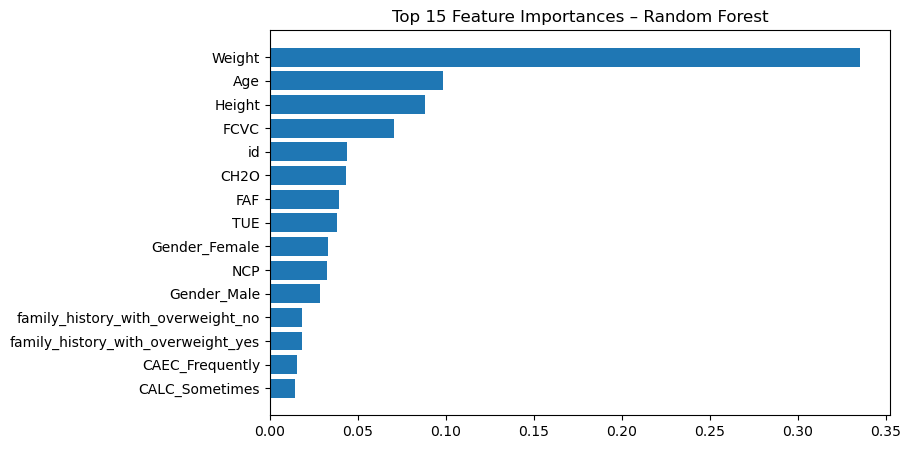

In [25]:


# After fitting rf on X_dum, y
importances = rf.feature_importances_
feat_imp = pd.DataFrame({
    "feature": X_dum.columns,
    "importance": importances
}).sort_values("importance", ascending=False).head(15)

plt.figure(figsize=(8,5))
plt.barh(feat_imp["feature"], feat_imp["importance"])
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances – Random Forest")
plt.show()


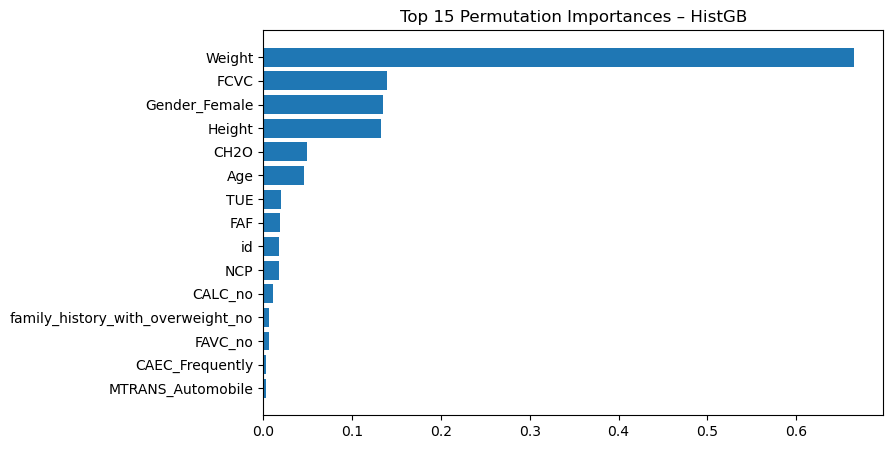

In [26]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X_dum, y, n_repeats=10,
                                random_state=RANDOM_STATE, n_jobs=-1)

perm_imp = pd.DataFrame({
    "feature": X_dum.columns,
    "importance": result.importances_mean
}).sort_values("importance", ascending=False).head(15)

plt.figure(figsize=(8,5))
plt.barh(perm_imp["feature"], perm_imp["importance"])
plt.gca().invert_yaxis()
plt.title("Top 15 Permutation Importances – HistGB")
plt.show()
